# Project 2

Griffith and Becca

# Q: How does not getting an appropriate of sleep effect the spread of sickness?

An inappropriate amount of sleep - either too little or too much - can weaken the immune system. This can make it easier for individuals to become infected by a sickness. This model aims to determine how having different percentages of the population with different amounts of sleep affects the spread of a sickness accross that population.

# To Do
* Fix make_system to work such that infected and susceptible add up to 1000, right now they add up to more.
* Survey with Olin students, how much sleep do they get?
* Implement number of Olin students into total enrollment (335). Make sure to prevent fractional students!

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

This model relies on a lot of stocks (11 to be specific). There are susceptible and infected stocks for all sleep values (As the contact rate is different for each).

In [2]:
def make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, infectedInitial, beta5, beta6, beta7, beta8, beta9, beta, gamma):
    """Make a system object for the SIR model.
    
    sleepFive: Percentage of the population with five or less hours of sleep
    sleepSix: Percentage of the population with six hours of sleep
    sleepSeven: Percentage of the population with seven hours of sleep
    sleepEight: Percentage of the population with eight hours of sleep
    sleepNine: Percentage of the population with nine or more hours of sleep
    infectedInitial: Percentage of the population that starts out infected
    
    beta5: contact rate multiplier in for five hours of sleep
    beta6: contact rate multiplier for six hours of sleep
    beta7: contact rate multiplier for seven hours of sleep
    beta8: contact rate multiplier for eight hours of sleep
    beta9: contact rate multiplier for nine hours of sleep
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    TotalPopulation = 1000
    SusceptiblePopulation = 1000 - (initialInfected * TotalPopulation)
    
    S5 = sleepFive * SusceptiblePopulation
    S6 = sleepSix * SusceptiblePopulation
    S7 = sleepSeven * SusceptiblePopulation
    S8 = sleepEight * SusceptiblePopulation
    S9 = sleepNine *  SusceptiblePopulation 
    
    I5 = sleepFive * TotalPopulation * infectedInitial
    I6 = sleepSix * TotalPopulation * infectedInitial
    I7 = sleepSeven * TotalPopulation * infectedInitial
    I8 = sleepEight * TotalPopulation * infectedInitial
    I9 = sleepNine * TotalPopulation * infectedInitial
    
    init = State(S5=S5, S6=S6, S7=S7, S8=S8, S9=S9, 
                 I5=I5, I6=I6, I7=I7, I8=I8, I9=I9, 
                 R=0)
    t0 = 0
    t_end = 100
    

    return System(init=init, t0=t0, t_end=t_end,
                  beta5=beta5, beta6=beta6, beta7=beta7, beta8=beta8, beta9=beta9,
                  beta=beta, gamma=gamma)

There are two plot functions. One plots the total Susceptible, Infected, and Recovered (SIR) and prints out a statement with the percentages of each. The other plot function plots all of the stocks (All of the various sleep values for susceptible and infected).

# FIX PLOT FUNCTION and total infected (If needed)
* Add a way to display the fraction that is each sleep group
* add recovered based on sleep

In [3]:
def plot_results_all(results):
    """Plot the results of a SIR model.
    
    results: Dataframe with the results of the model
    """
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    TotalInfected = results.I5 + results.I6 + results.I7 + results.I8 + results.I9
    
    plot(TotalSusceptible, '--', label='Total Susceptible')
    plot(TotalInfected, '-', label='Total Infected')
    plot(results.R, ':', label='Total Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [4]:
def plot_results_seperate(results):
    """PLot the results of a SIR model with seperate groups.
    
    results: Dataframe with the results of the model"""

In [5]:
def calc_total_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame with columns S, I, R
    
    returns: fraction of population
    """
    return get_first_value(results.S) - get_last_value(results.S)

Uses the make_system function to make a system with the below fractions of people who get five, six, seven, eight, and nine hours of sleep. Also specify the portion of the population that starts out infected.

In [6]:
sleepFive = 0.052
sleepSix = 0.233
sleepSeven = 0.427
sleepNine = 0.05
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
initialInfected = .05

#Numbers made up currently
beta5 = 1.7 #contact rate multiplier in for five hours of sleep
beta6 = 1.29 #contact rate multiplier for six hours of sleep
beta7 = 1.15 #contact rate multiplier for seven hours of sleep
beta8 = 1.0 #contact rate multiplier for eight hours of sleep
beta9 = 1.49 #contact rate multiplier for nine hours of sleep
beta = 0.333
gamma = 0.25
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

,values
init,S5 49.40 S6 221.35 S7 405.65 S8 2...
t0,0
t_end,100
beta5,1.7
beta6,1.29
beta7,1.15
beta8,1
beta9,1.49
beta,0.333
gamma,0.25


In [16]:
def slope_func(state, t, system):
    """Update the SIR model.
    
    state: State (s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r)
    t: time
    system: System object
    
    returns: pair of derivatives
    """ 
    s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r = state
    unpack(system)
    
    s = s5 + s6 + s7 + s8 + s9 # Total susceptible
    i = i5 + i6 + i7 + i8 + i9 # Total infected
    
    #VERIFY: Check: total change in infected = -(total change in susceptible) - (total change in recovered)
    ds5dt = -(beta*beta5) * i * s5 #The change in the 5 hour of susceptible sleep group = infection rate * total infected * percent of susceptible that have 5 hours of sleep
    di5dt = -ds5dt - gamma * i5 #Change in 5 hour of sleep infected group = change in susceptible group becoming infected - (recovery rate * percentage of infected that have 5 hours of sleep)
    
    ds6dt = -(beta*beta6) * i * s6
    di6dt = -ds6dt - gamma * i6
    
    ds7dt = -(beta*beta7) * i * s7
    di7dt = -ds7dt - gamma * i7
    
    ds8dt = -(beta*beta8) * i * s8
    di8dt = -ds8dt - gamma * i8
    
    ds9dt = -(beta*beta9) * i * s9
    di9dt = -ds9dt - gamma * i9

    drdt = gamma * i
    
    print('i5 = ' , i5)
    print('i6 = ' , i6)
    print('i7 = ' , i7)
    print('i8 = ' , i8)
    print('i9 = ' , i9)      
    print('i = ' , i)
    
    print('Check to make sure Total Infected Change = -(Total Susceptible Change) - (Total Recovered Change)')
    TotalSchange = ds5dt + ds6dt + ds7dt + ds8dt + ds9dt
    TotalIchange = di5dt + di6dt + di7dt + di8dt + di9dt
    print('Total Infected Change = ' , TotalIchange)
    print('Total Susceptible Change = ' , TotalSchange)
    print('Total Recovered Change = ' , drdt)
    print('-(Total Susceptible Change) - (Total Recovered Change) = ' , -TotalSchange - drdt)
    #dsdt = -beta * i * s 
    #didt = beta * i * s - gamma * i
    #drdt = gamma * i
    
    return ds5dt, di5dt, ds6dt, di6dt, ds7dt, di7dt, ds8dt, di8dt, ds9dt, di9dt, drdt

In [17]:
slope_func(system.init, system.t0, system)

i5 =  2.6
i6 =  11.65
i7 =  21.35
i8 =  11.9
i9 =  2.5
i =  50.0
Check to make sure Total Infected Change = -(Total Susceptible Change) - (Total Recovered Change)
Total Infected Change =  18850.185100000002
Total Susceptible Change =  -18862.685100000002
Total Recovered Change =  12.5
-(Total Susceptible Change) - (Total Recovered Change) =  18850.185100000002


(-1398.267,
 1397.617,
 -4754.265975000001,
 4751.353475000001,
 -7767.183375,
 7761.845875,
 -3764.5650000000005,
 3761.5900000000006,
 -1178.40375,
 1177.77875,
 12.5)

In [15]:
system.init

,values
S5,49.40
S6,221.35
S7,405.65
S8,226.10
S9,47.50
I5,2.60
I6,11.65
I7,21.35
I8,11.90
I9,2.50


In [10]:
results.plot()

NameError: name 'results' is not defined

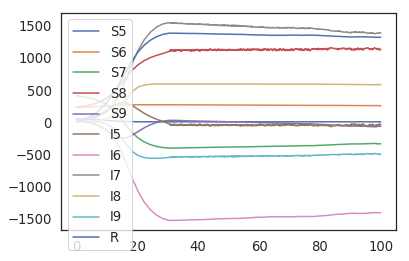

In [12]:
results.plot()